### **Ë≥áÊñôÂâçËôïÁêÜ**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm
from scipy.io import arff
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.metrics import mean_squared_error, r2_score

# font
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÂûã - ÂæÆËªüÊ≠£ÈªëÈ´î
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†Ëôü'-'È°ØÁ§∫ÁÇ∫ÊñπÂ°äÁöÑÂïèÈ°å


In [2]:
# run on Kaggle
import os

# ÂàóÂá∫ Kaggle input ÁõÆÈåÑ‰∏ãÁöÑ dataset
os.listdir("/kaggle/input/")
test_file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes-test/wave_2_classes_with_irrelevant_attributes.test.arff"
train_file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes-train/wave_2_classes_with_irrelevant_attributes.train.arff"
file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes/wave_2_classes_with_irrelevant_attributes.arff"

data_file, meta_file = arff.loadarff(file)
df_file = pd.DataFrame(data_file)
# loadarff ÂáΩÂºèÊúÉÂõûÂÇ≥ÂÖ©ÂÄãÂÄºÔºö
# data_fileÔºöÂåÖÂê´ ARFF Ê™îÊ°à‰∏≠ÁöÑË≥áÊñôÔºå‰ª• NumPy array ÁöÑÂΩ¢ÂºèÂÑ≤Â≠ò„ÄÇ
# meta_fileÔºöÂåÖÂê´ ARFF Ê™îÊ°àÁöÑÂÖÉË≥áÊñôÔºàmetadataÔºâÔºåÂ¶ÇÂ±¨ÊÄßÂêçÁ®±ÂíåÈ°ûÂûãÁ≠âË≥áË®ä„ÄÇ

print(f"Nan counts: {df_file.info()}")  # dtype and Nan
print("\n")
print(f"Data statistic:\n{df_file.describe()}")  # statistic
print("\n")

print(f"Data:\n{df_file.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33334 entries, 0 to 33333
Columns: 123 entries, v1 to sample
dtypes: float64(121), object(2)
memory usage: 31.3+ MB
Nan counts: None


Data statistic:
                 v1            v2            v3            v4            v5  \
count  33334.000000  33334.000000  33334.000000  33334.000000  33334.000000   
mean      -0.000737      0.506510      0.992686      1.513630      2.011642   
std        1.001741      1.039947      1.152756      1.322462      1.521303   
min       -4.600000     -3.790000     -3.170000     -3.220000     -3.380000   
25%       -0.680000     -0.200000      0.200000      0.590000      0.930000   
50%       -0.010000      0.500000      0.990000      1.520000      2.010000   
75%        0.680000      1.200000      1.780000      2.440000      3.100000   
max        4.500000      5.200000      5.720000      6.230000      7.310000   

                 v6            v7            v8            v9           v10  \
count  3

In [3]:
# train_file = "wave_2_classes_with_irrelevant_attributes.train.arff"
data_train, meta_train = arff.loadarff(train_file)
df_train = pd.DataFrame(data_train)
# loadarff ÂáΩÂºèÊúÉÂõûÂÇ≥ÂÖ©ÂÄãÂÄºÔºö
# data_trainÔºöÂåÖÂê´ ARFF Ê™îÊ°à‰∏≠ÁöÑË≥áÊñôÔºå‰ª• NumPy array ÁöÑÂΩ¢ÂºèÂÑ≤Â≠ò„ÄÇ
# meta_trainÔºöÂåÖÂê´ ARFF Ê™îÊ°àÁöÑÂÖÉË≥áÊñôÔºàmetadataÔºâÔºåÂ¶ÇÂ±¨ÊÄßÂêçÁ®±ÂíåÈ°ûÂûãÁ≠âË≥áË®ä„ÄÇ

print(f"Nan counts: {df_train.info()}")  # dtype and Nan
print("\n")
print(f"Training Data statistic:\n{df_train.describe()}")  # statistic
print("\n")

print(f"Training Data:\n{df_train.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, v1 to classe
dtypes: float64(121), object(1)
memory usage: 9.3+ MB
Nan counts: None


Training Data statistic:
                 v1            v2            v3            v4            v5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.015510      0.502448      0.990235      1.526273      2.002926   
std        1.002254      1.034205      1.150970      1.329144      1.541289   
min       -3.850000     -3.490000     -3.070000     -3.180000     -3.280000   
25%       -0.660000     -0.200000      0.210000      0.590000      0.890000   
50%        0.020000      0.490000      0.970000      1.530000      1.990000   
75%        0.700000      1.200000      1.770000      2.440000      3.100000   
max        3.710000      5.200000      5.260000      6.230000      7.160000   

                 v6            v7            v8            v9           v10  \
c

In [4]:
# test_file = "wave_2_classes_with_irrelevant_attributes.test.arff"
data_test, meta_test = arff.loadarff(test_file)
df_test = pd.DataFrame(data_test)
# loadarff ÂáΩÂºèÊúÉÂõûÂÇ≥ÂÖ©ÂÄãÂÄºÔºö
# data_testÔºöÂåÖÂê´ ARFF Ê™îÊ°à‰∏≠ÁöÑË≥áÊñôÔºå‰ª• NumPy array ÁöÑÂΩ¢ÂºèÂÑ≤Â≠ò„ÄÇ
# meta_testÔºöÂåÖÂê´ ARFF Ê™îÊ°àÁöÑÂÖÉË≥áÊñôÔºàmetadataÔºâÔºåÂ¶ÇÂ±¨ÊÄßÂêçÁ®±ÂíåÈ°ûÂûãÁ≠âË≥áË®ä„ÄÇ

print(f"Nan counts: {df_test.info()}")  # dtype and Nan
print("\n")
print(f"Testing Data statistic:\n{df_test.describe()}")  # statistic
print("\n")

print(f"Testing Data:\n{df_test.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23334 entries, 0 to 23333
Columns: 122 entries, v1 to classe
dtypes: float64(121), object(1)
memory usage: 21.7+ MB
Nan counts: None


Testing Data statistic:
                 v1            v2            v3            v4            v5  \
count  23334.000000  23334.000000  23334.000000  23334.000000  23334.000000   
mean      -0.007700      0.508251      0.993737      1.508212      2.015378   
std        1.001462      1.042415      1.153543      1.319580      1.512675   
min       -4.600000     -3.790000     -3.170000     -3.220000     -3.380000   
25%       -0.680000     -0.200000      0.200000      0.590000      0.940000   
50%       -0.020000      0.510000      0.990000      1.510000      2.010000   
75%        0.670000      1.200000      1.780000      2.440000      3.100000   
max        4.500000      4.540000      5.720000      6.040000      7.310000   

                 v6            v7            v8            v9           v10  \


In [5]:
X_train = df_train.drop(columns=['classe'])
y_train = df_train['classe']

X_test = df_test.drop(columns=['classe'])
y_test = df_test['classe']


### **ÁâπÂæµÁ∏ÆÊîæ„ÄÅLabeling**

- ÊâÄÊúâ features ËΩâÊèõÁÇ∫Âπ≥ÂùáÂÄºÁÇ∫0ÔºåÊ®ôÊ∫ñÂ∑ÆÁÇ∫1ÁöÑÂàÜ‰Ωà

- Â∞çÊñº‰∫åÂÖÉÂàÜÈ°ûÂïèÈ°åÁöÑÁõÆÊ®ôËÆäÊï∏ y:
    - Label Encoding ÊòØÊúÄÂêàÈÅ©ÁöÑÔºöÂ∞áÈ°ûÂà•ËΩâÊèõÁÇ∫ 0 Âíå 1
    - One-Hot Encoding ‰∏çÈÅ©ÂêàÔºöÂõ†ÁÇ∫ÊòØÁõÆÊ®ôËÆäÊï∏ËÄåÈùûÁâπÂæµÔºå‰∏îÊòØ‰∫åÂÖÉÂàÜÈ°ûÂïèÈ°å

In [6]:
# ÁâπÂæµÁ∏ÆÊîæ(ÈÅ©Áî®ÊñºLASSOÂíåÂõûÊ≠∏ÊñπÊ≥ï) - X Standardization

X_train_columns = X_train.columns.tolist() # ‰øùÂ≠ò columns nameÔºåStandardScaler() ÊúÉÁßªÈô§
X_test_columns = X_test.columns.tolist() # ‰øùÂ≠ò columns nameÔºåStandardScaler() ÊúÉÁßªÈô§

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# StandardScaler() Ë∑ü LabelEncoder()ÔºåÁ∂ìÈÅé fit_transform() ÂæåÔºåÈÉΩÊúÉÂõûÂÇ≥ NumPy ndarray
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X_train_columns # ÊîæÂõû name
X_test.columns = X_test_columns # ÊîæÂõû name

print(f"X_train shapeÔºö{X_train.shape}")
print(f"X_test shapeÔºö{X_test.shape}")
print(f"X_train label:\n{X_train.head()}")
print("\n")
print(f"X_test label:\n{X_test.head()}")


X_train shapeÔºö(10000, 121)
X_test shapeÔºö(23334, 121)
X_train label:
         v1        v2        v3        v4        v5        v6        v7  \
0 -0.394640 -1.182076  0.269147  1.138931  0.062986  0.517232  0.589884   
1 -0.344750 -0.447176 -0.139224 -0.621689  0.815640 -0.622519 -0.007359   
2  0.463469  0.423102  1.303109  0.973402  0.601523  1.668980 -0.007359   
3  0.553271  0.626166  0.625386  0.695014 -0.910275 -0.268596 -0.647646   
4 -2.001100 -2.294097  0.034551  0.409101  0.919455  0.565222  1.875839   

         v8        v9       v10  ...    alea91    alea92    alea93    alea94  \
0  0.168278 -1.386143  1.034561  ... -0.594646  1.010081 -1.051933 -0.971534   
1  0.150392 -0.962362 -0.716605  ... -1.605570 -1.041996  1.231688  1.145159   
2  1.420278  1.224101  0.588571  ... -1.047819 -0.276815  0.920285  1.526857   
3 -0.910827 -0.722834  0.103230  ...  0.904310 -1.737616  0.020677 -0.728635   
4  0.359059 -1.140473 -0.100089  ... -0.350630 -1.668054 -0.083124 -1.214434 

In [7]:
# y Label Encoding

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# StandardScaler() Ë∑ü LabelEncoder()ÔºåÁ∂ìÈÅé fit_transform() ÂæåÔºåÈÉΩÊúÉÂõûÂÇ≥ NumPy ndarray
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(f"y_train shapeÔºö{y_train.shape}")
print(f"y_test shapeÔºö{y_test.shape}")
print(f"y_train label:\n{y_train.head()}")
print(f"y_test label:\n{y_test.head()}")

y_train shapeÔºö(10000, 1)
y_test shapeÔºö(23334, 1)
y_train label:
   0
0  0
1  0
2  0
3  0
4  0
y_test label:
   0
0  0
1  0
2  0
3  0
4  0


#### **Ê™¢Êü• outliers**

-  Z-score ÊñπÊ≥ïÊ™¢Ê∏¨Áï∞Â∏∏ÂÄº
    - ÂÅáË®≠Ë≥áÊñôÂëàÂ∏∏ÊÖãÂàÜ‰Ωà‰∏≠ÔºåÁ¥Ñ 99.7% ÁöÑË≥áÊñôÈªû‰ΩçÊñºÂπ≥ÂùáÂÄºÁöÑ‰∏âÂÄãÊ®ôÊ∫ñÂ∑Æ‰πãÂÖß„ÄÇZ-score Â§ßÊñº 3 ÁöÑË≥áÊñôÈªûË¢´Ë™çÁÇ∫ÊòØÁï∞Â∏∏ÂÄº„ÄÇ
    - Â¶ÇÊûúË≥áÊñô‰∏çÂëàÂ∏∏ÊÖãÂàÜ‰ΩàÔºåÂâá Z-score ÂèØËÉΩÁÑ°Ê≥ïÊ∫ñÁ¢∫Âú∞Ê™¢Ê∏¨Áï∞Â∏∏ÂÄº„ÄÇ

In [8]:
z_scores = np.abs((X_train - X_train.mean()) / X_train.std())
outliers = (z_scores > 3).any(axis=1)
print("Outliers counts:", outliers.sum())


Outliers counts: 324


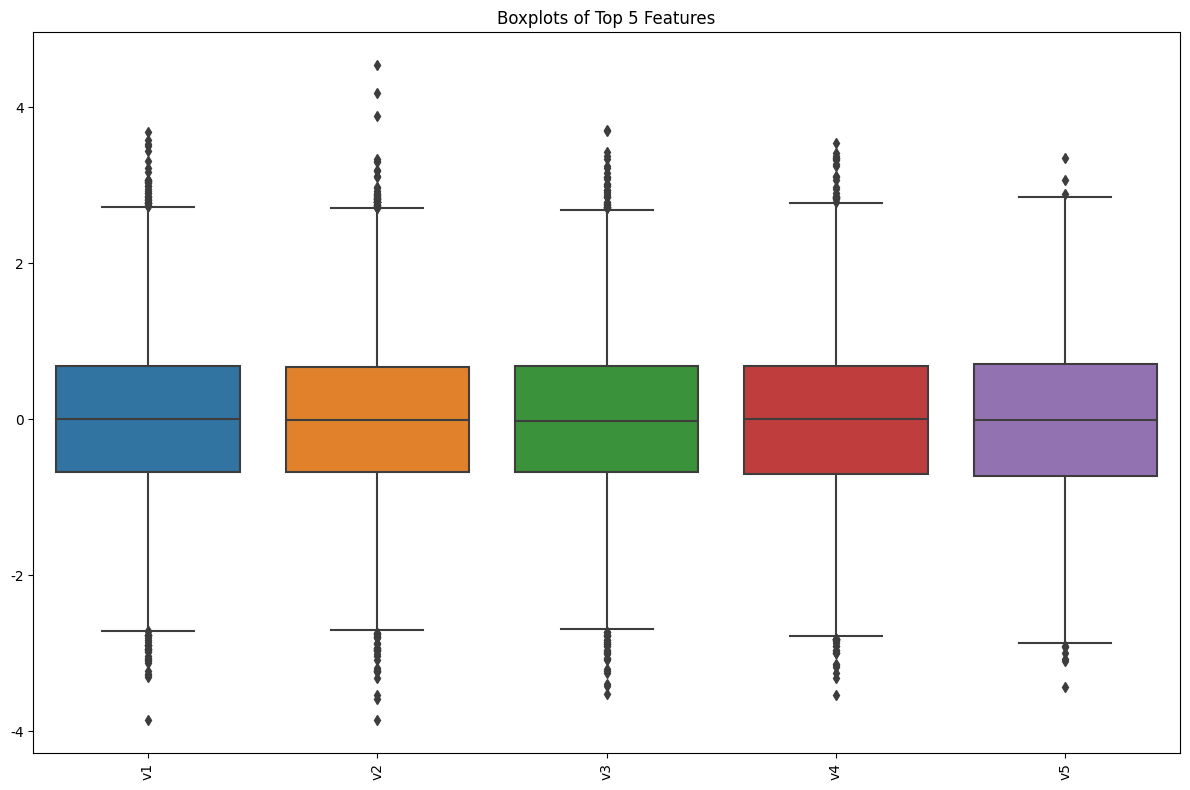

In [9]:
# Boxplots of Top 5 Features

X_train = pd.DataFrame(X_train)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train.iloc[:, :5])
plt.xticks(rotation=90)
plt.title("Boxplots of Top 5 Features")
plt.tight_layout()
plt.show()


In [10]:
# Áï∞Â∏∏ÂÄºÊï∏Èáè‰ΩîÊØîÂ∞èÊñº 5%Ôºà324/10000 ‚âà 3.2%ÔºâÔºåÈÅ∏ÊìáÁõ¥Êé•Âà™Èô§
# Dropping Outliers

X_train = X_train[~outliers]
y_train = y_train[~outliers]
# ~ ÊúÉÂ∞ç List ÈÄ≤Ë°åÈÇèËºØÂèçËΩâÔºåÂç≥ True ËÆäÊàê FalseÔºåFalse ËÆäÊàê True
print(f"X_train shapeÔºö{X_train.shape}")
print(f"y_train shapeÔºö{y_train.shape}")


X_train shapeÔºö(9676, 121)
y_train shapeÔºö(9676, 1)


### **Ë®àÁÆóÁâπÂæµÁõ∏ÈóúÊÄß**

- Áî±Êñº Wave Ë≥áÊñôÈõÜÂåÖÂê´Â§ßÈáèËÆäÊï∏(121ÂÄã)ÔºåÈúÄË¶ÅÊ™¢Êü•Â§öÈáçÂÖ±Á∑öÊÄßÔºàmulticollinearityÔºâÔºö

In [11]:
corr_matrix = X_train.corr().abs() # .abs() Âè™ÁïôÊÑèÂ§ßÂ∞èÔºå‰∏çÂú®‰πéÊñπÂêë

# ÊâæÂá∫È´òÂ∫¶Áõ∏ÈóúÁöÑÁâπÂæµÂ∞ç(Áõ∏Èóú‰øÇÊï∏>0.8)
high_corr_var = np.where(np.triu(corr_matrix, k=1) > 0.8) # np.triu(, k=1) ÊúÉÁî¢Áîü‰∏ä‰∏âËßíÁü©Èô£ÔºåÁÇ∫Áõ∏Èóú‰øÇÊï∏Áü©Èô£‰∏äÂçäÈÉ®ÂàÜÔºåk=1 Ë°®Á§∫Âæû‰∏ªÂ∞çËßíÁ∑ö‰∏äÊñπÈñãÂßã„ÄÇ
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y])
                    for x, y in zip(*high_corr_var)]
print("High corr pairs:", high_corr_pairs)

# corr X features with y
X_train.corrwith(y_train) # ÈÅçÊ≠∑ 121 ÂÄã featureÔºåÊØèÊ¨°ÂèñÂá∫ 9676 ÂÄã sampleÔºåË®àÁÆóË©≤ feature Ëàá y_train ÁöÑ corr
y_train = y_train.squeeze()  # ÈôçÁ∂≠Êàê 1D (9676, 1) -> (9676,)
corr_y = X_train.corrwith(y_train)
print("X corr with y:\n",corr_y.abs().sort_values(ascending=False))


High corr pairs: []
X corr with y:
 v10       0.640247
v11       0.607504
v17       0.606459
v9        0.599413
v16       0.557382
            ...   
alea37    0.000435
alea56    0.000232
alea95    0.000196
alea85    0.000051
alea9     0.000014
Length: 121, dtype: float64


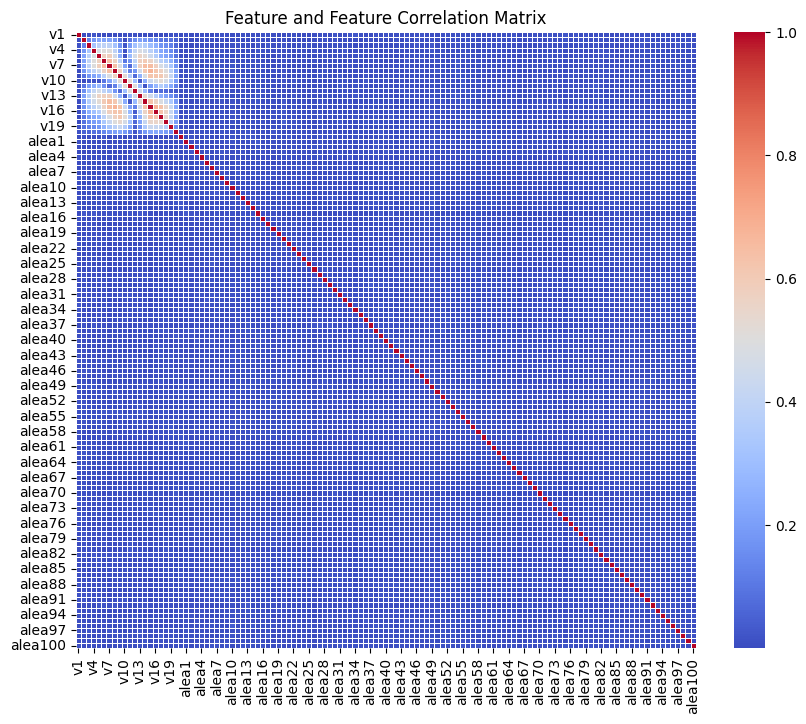

In [12]:
# Pearson Correlation Coefficient Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature and Feature Correlation Matrix")
plt.show()


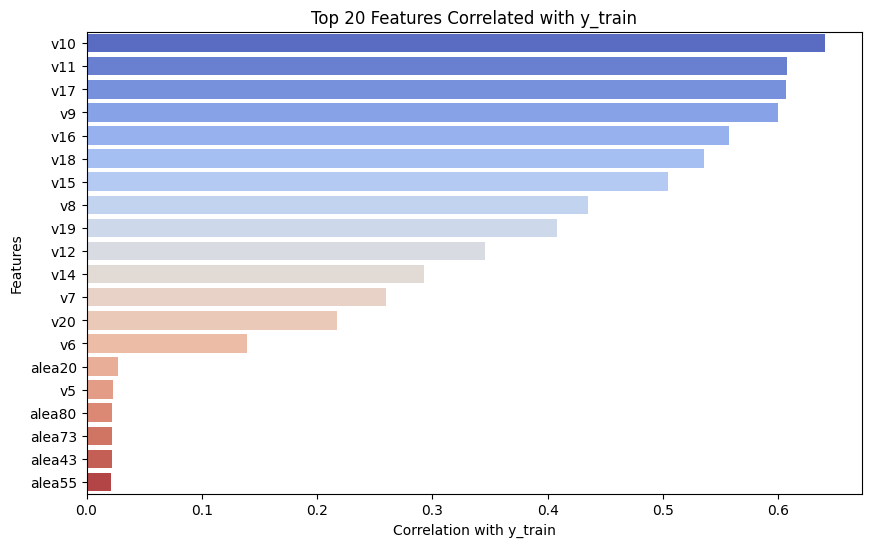

In [13]:
# Top related 20 Features Correlated with y_train

top20_features = corr_y.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top20_features.values, y=top20_features.index, palette="coolwarm")
plt.xlabel("Correlation with y_train")
plt.ylabel("Features")
plt.title("Top 20 Features Correlated with y_train")
plt.show()


 #### **Â∞èÁµêË´ñ**

- X Ê≤íÊúâ‰ªª‰Ωï feature ÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÁµïÂ∞çÂÄºÂ§ßÊñº 0.8Ôºö
    - **ÁâπÂæµ‰πãÈñìÁç®Á´ãÔºåÂ§öÈáçÂÖ±Á∑öÊÄßÔºàmulticollinearityÔºâ‰Ωé**„ÄÅÁ∑öÊÄßÁõ∏ÈóúÊÄßÁõ∏Â∞çËºÉ‰ΩéÔºåÁç®Á´ãÁöÑÁâπÂæµÂèØ‰ª•Êèê‰æõÊõ¥Â§öÁöÑË≥áË®äÔºå**ÊúâÂä©ÊñºÊ®°ÂûãÂ≠∏Áøí„ÄÇ**
    - ‰∏çÈúÄË¶ÅÁßªÈô§‰ªª‰ΩïÂÜóÈ§òÁâπÂæµ„ÄÇ
    - ‰ΩÜÊòØ**ÂæàÂ§öÈùûÁ∑öÊÄßÊñπÊ≥ï‰∏¶‰∏ç‰æùË≥¥ËÆäÊï∏‰πãÈñìÁöÑÁõ∏ÈóúÊÄß**

- 121 ÂÄã X ÁöÑfeature Â∞ç y ÁöÑÁõ∏ÈóúÊÄß‰∏≠**Ê≤íÊúâË≤†Êï∏**:
    -  Âõ† y ÁÇ∫‰∫åÂÖÉÂàÜÈ°ûÊ®ôÁ±§ 0/1ÔºåËÄå **X ÁöÑÊï∏ÊìöÂàÜ‰ΩàËàá y ÁöÑÊ®ôÁ±§ÊñπÂêë‰∏ÄËá¥**„ÄÇ
    -  v10 (0.612), v11 (0.583), v17 (0.577) Á≠âÁâπÂæµËàá y ÁöÑÁõ∏ÈóúÊÄßÈ´òÔºåË°®Á§∫ÈÄô‰∫õÁâπÂæµÂ∞çÂàÜÈ°ûÁµêÊûúÂΩ±ÈüøÂæàÂ§ß„ÄÇ

### **‰ΩøÁî® Linear / Logit Model + Stepwise / LASSO ÈÅ∏Êìá Features**

- **OLS Áî®ÊñºÁâπÂæµÈÅ∏ÊìáÔºåLogistic Regression Áî®ÊñºÂàÜÈ°û**
  
**Stepwise ÊñπÊ≥ïÊØîËºÉ**
|  | Âü∫Êñº MSE ÁöÑ‰∫§ÂèâÈ©óË≠â | Âü∫Êñº p ÂÄº ÁöÑ OLS |
|---|---|---|
| **ÈÅ∏ÊìáÊ®ôÊ∫ñ** | **ÊúÄÂ∞è MSE**ÔºàÊ®°ÂûãÁöÑË™§Â∑ÆÊúÄÂ∞èÔºâ | **ÊúÄÂ∞è p ÂÄº**ÔºàÁµ±Ë®àÈ°ØËëóÊÄßÔºâ |
| **ÈÅ©Áî®Â†¥ÊôØ** | **È†êÊ∏¨Ê®°ÂûãÔºàÂ¶ÇÊ©üÂô®Â≠∏ÁøíÊáâÁî®Ôºâ** | **Áµ±Ë®àÂàÜÊûêÔºàÂ¶ÇÂ≠∏Ë°ìÁ†îÁ©∂Ôºâ** |
| **Ë®àÁÆóÊñπÂºè** | `cross_val_score()` + MSE Ë®àÁÆó | `OLS()` + p ÂÄºË®àÁÆó |
| **ÂÖ±Á∑öÊÄßÂΩ±Èüø** | ÂΩ±ÈüøËºÉÂ∞èÔºåÂõ†ÁÇ∫Âü∫Êñº MSE | ÂΩ±ÈüøËºÉÂ§ßÔºåVIF È´òÊôÇ p ÂÄºÂèØËÉΩ‰∏çÂèØÈù† |
| **Ë®àÁÆóÊàêÊú¨** | È´òÔºàÂ§öÊ¨°‰∫§ÂèâÈ©óË≠âÔºâ | ‰ΩéÔºàÊØèÂõûÂêàÂÉÖÂü∑Ë°å‰∏ÄÊ¨° OLSÔºâ |
| **ÈÅéÊì¨ÂêàÈ¢®Èö™** | ‰ΩéÔºà‰∫§ÂèâÈ©óË≠âÊúâÂä©ÊñºÊ≠£ÂâáÂåñÔºâ | ËºÉÈ´òÔºàp ÂÄºÈÅéÊñºÊïèÊÑüÔºâ |

**‰ΩøÁî® MSE ÊñπÊ≥ïÔºö**
- ÁõÆÊ®ôÊòØ**Ê©üÂô®Â≠∏ÁøíÈ†êÊ∏¨**
- ÊìîÂøÉ**ÈÅéÊì¨Âêà**ÔºåÂ∏åÊúõ‰ΩøÁî®**‰∫§ÂèâÈ©óË≠â**‰æÜÈÅ∏ÊìáÊúÄ‰Ω≥ËÆäÊï∏„ÄÇ

**‰ΩøÁî® p ÂÄº ÊñπÊ≥ïÔºö**
- ÁõÆÊ®ôÊòØ**Áµ±Ë®àÊé®Ë´ñ„ÄÅÂ≠∏Ë°ìÁ†îÁ©∂**
- ËÆäÊï∏ËºÉÂ∞ëÔºàÈÅøÂÖçÂÖ±Á∑öÊÄßÂΩ±Èüø p ÂÄºÔºâ„ÄÇ
- ËÆäÊï∏ÂÖ∑ÂÇôÁµ±Ë®àÈ°ØËëóÊÄßÔºàÂ¶ÇÂõûÊ≠∏Â†±ÂëäÔºâ„ÄÇ


#### **Linear / Logit Model + Forward Selection**

- ÂæûÁ©∫ÈõÜÈñãÂßãÔºå**„ÄåÈÅ∏Êìá„ÄçÂì™‰∫õÁâπÂæµ‰∏çË¢´ÂâÉÈô§Ôºå‰πüÂ∞±ÊòØÈÅ∏ÊìáÈáçË¶ÅÁöÑÁâπÂæµ**„ÄÇ
- ÈÅ©Áî®ÊñºÔºöÂ∏åÊúõÂæû‰∏ÄÂÄãÁõ∏Â∞çËºÉÂ∞èÁöÑÁâπÂæµÈõÜÈñãÂßãÔºå‰∏¶ÈÄêÊ≠•Âä†ÂÖ•Êõ¥Â§öÁöÑÁâπÂæµÊôÇ„ÄÇ
  
- ÂÑ™Èªû:
    - Á∞°ÂñÆÊòìÊáÇÔºöÂæûÁ©∫ÈõÜÈñãÂßãÔºåÈÄêÊ≠•Âä†ÂÖ•ÁâπÂæµÔºåÈÅéÁ®ãÊ∏ÖÊô∞„ÄÇ
    - Ë®àÁÆóÊïàÁéáÈ´òÔºöÊØèÊ¨°Âè™ËÄÉÊÖÆÂñÆÂÄãÁâπÂæµÔºåÂõ†Ê≠§ÊØèÊ¨°Âè™ÈúÄË®àÁÆó‰∏ÄÊ¨°Ê®°ÂûãÔºå**ÈÅ©ÂêàÁâπÂæµÊï∏ÈáèËºÉÂ∞ëÁöÑÊÉÖÊ≥Å**„ÄÇ

- Áº∫Èªû:
    - ÂèØËÉΩ**ÂøΩÁï•‰∫§‰∫í‰ΩúÁî®**ÔºöÂ¶ÇÊûúÁâπÂæµÈñìÊúâ‰∫§‰∫í‰ΩúÁî®ÔºåÊüê‰∫õÁâπÂæµÂèØËÉΩÊúÉË¢´ÈÅ∫ÊºèÔºåÂõ†ÁÇ∫Âú®ÂñÆÁç®ËÄÉÊÖÆÊØèÂÄãÁâπÂæµÁöÑÊôÇÂÄôÂÆÉÂÄëÂèØËÉΩË°®Áèæ‰∏çÁ™ÅÂá∫„ÄÇ
    - **ÂÆπÊòì Overfitting**ÔºöÂ¶ÇÊûúË≥áÊñôÈõÜÊØîËºÉÂ∞èÔºåÈÄôÁ®ÆÊñπÊ≥ïÂÆπÊòìÂú®ÊØèÊ¨°ÈÅ∏Êìá‰∏≠Â∞çË®ìÁ∑¥ÈõÜÈÄ≤Ë°åÈÅéÂ∫¶Êì¨Âêà„ÄÇ
      

In [14]:
# OLS forward_selection based on p-value

def OLS_forward_selection(X, y, significance_level=0.05, verbose=True):
    initial_features = X.columns.tolist()
    best_features = []
    selected_features_log ={}
    counts = 0

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)

            selected_features_log[best_feature] = min_p_value
            counts += 1
        else:
            break

    if verbose and selected_features_log:
        print("Selected features by OLS Forward SelectionÔºàGood FeaturesÔºâ:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of added features: {counts}")
    return best_features

OLS_forward_features = OLS_forward_selection(X_train, y_train)
print(f"Selected FeaturesÔºö{OLS_forward_features}")


Selected features by OLS Forward SelectionÔºàGood FeaturesÔºâ:
Feature: v8         P-value: 0.0000
Feature: v17        P-value: 0.0000
Feature: v12        P-value: 0.0000
Feature: v10        P-value: 0.0000
Feature: v11        P-value: 0.0000
Feature: v9         P-value: 0.0000
Feature: v16        P-value: 0.0000
Feature: v18        P-value: 0.0000
Feature: v5         P-value: 0.0000
Feature: v15        P-value: 0.0000
Feature: v4         P-value: 0.0000
Feature: v19        P-value: 0.0000
Feature: v13        P-value: 0.0000
Feature: v20        P-value: 0.0005
Feature: v3         P-value: 0.0143
Feature: v14        P-value: 0.0137
Feature: alea80     P-value: 0.0250
Feature: v21        P-value: 0.0305
Feature: alea85     P-value: 0.0406
Sum of added features: 19
Selected FeaturesÔºö['v8', 'v17', 'v12', 'v10', 'v11', 'v9', 'v16', 'v18', 'v5', 'v15', 'v4', 'v19', 'v13', 'v20', 'v3', 'v14', 'alea80', 'v21', 'alea85']


In [15]:
# Logit forward_selection based on p-value
def Logit_forward_selection(X, y, significance_level=0.05, verbose=True):
    initial_features = X.columns.tolist()
    best_features = []
    selected_features_log ={}
    counts = 0

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[best_features+[new_column]]))).fit(disp=0) # disp=0 Á¶ÅÊ≠¢Ëº∏Âá∫Êî∂ÊñÇË®äÊÅØ
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            selected_features_log[best_feature] = min_p_value
            counts += 1
        else:
            break

    if verbose and selected_features_log:
        print("Selected features by Logit Forward SelectionÔºàGood FeaturesÔºâ:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of added features: {counts}")
    return best_features

Logit_forward_features = Logit_forward_selection(X_train, y_train)
print(f"Selected FeaturesÔºö{Logit_forward_features}")


Selected features by Logit Forward SelectionÔºàGood FeaturesÔºâ:
Feature: v8         P-value: 0.0000
Feature: v17        P-value: 0.0000
Feature: v10        P-value: 0.0000
Feature: v11        P-value: 0.0000
Feature: v9         P-value: 0.0000
Feature: v12        P-value: 0.0000
Feature: v16        P-value: 0.0000
Feature: v18        P-value: 0.0000
Feature: v15        P-value: 0.0000
Feature: v5         P-value: 0.0000
Feature: v19        P-value: 0.0000
Feature: v4         P-value: 0.0000
Feature: v13        P-value: 0.0000
Feature: v14        P-value: 0.0001
Feature: v20        P-value: 0.0003
Feature: alea14     P-value: 0.0205
Feature: alea81     P-value: 0.0384
Feature: alea23     P-value: 0.0493
Sum of added features: 18
Selected FeaturesÔºö['v8', 'v17', 'v10', 'v11', 'v9', 'v12', 'v16', 'v18', 'v15', 'v5', 'v19', 'v4', 'v13', 'v14', 'v20', 'alea14', 'alea81', 'alea23']


#### **Linear / Logit Model + Backward Elimination**

- ÂæûÂÆåÊï¥ÁâπÂæµÈõÜÈñãÂßãÔºåÈÄêÊ≠•ÁßªÈô§‰∏çÈáçË¶ÅÁöÑÁâπÂæµÔºå**ÈÅ©ÂêàÊìÅÊúâËºÉÂ§öÁâπÂæµÊôÇ**„ÄÇ
- ÈÅ©Áî®ÊñºÔºö**Â∑≤Á∂ìÊúâ‰∏ÄÂÄãÂÆåÊï¥ÁöÑÁâπÂæµÈõÜÔºå‰∏¶‰∏îÂ∏åÊúõÂæû‰∏≠ÂâîÈô§ÈÇ£‰∫õÂ∞çÈ†êÊ∏¨Ë≤¢Áçª‰∏çÂ§ßÁöÑÁâπÂæµÊôÇ**„ÄÇ
- ÂÑ™Èªû:
    - **ÈÅøÂÖç Overfitting**ÔºöÈÄöÈÅéÁßªÈô§‰∏çÈáçË¶ÅÁöÑÁâπÂæµÔºåÊúâÂä©ÊñºÊ∏õÂ∞ëÈÅéÊì¨ÂêàÁöÑÈ¢®Èö™„ÄÇ
    - Áõ¥ËßÄ‰∏îÁ∞°ÂñÆÔºöÂæûÂÖ®ÁâπÂæµÈñãÂßãÔºåÈÄêÊ≠•Ê∏õÂ∞ëÔºåÈÅéÁ®ãÊØîËºÉÁõ¥Êé•„ÄÇ

- Áº∫Èªû:
    - Ë®àÁÆóÈñãÈä∑ËºÉÂ§ßÔºöÊØèÊ¨°Ëø≠‰ª£ÈÉΩÈúÄË¶ÅË®ìÁ∑¥Ê®°Âûã‰∏¶Ë®àÁÆóÊØèÂÄãÁâπÂæµÁöÑÂΩ±ÈüøÔºåÂ∞çÊñºÁâπÂæµÊï∏ÈáèÂ§öÁöÑÊÉÖÊ≥ÅÔºå**Ë®àÁÆóÈáèÂ§ß**„ÄÇ
    - **ÂèØËÉΩÈåØÈÅéÈáçË¶ÅÁöÑ‰∫§‰∫í‰ΩúÁî®**ÔºöÂ¶ÇÊûúÁâπÂæµÈñìÂ≠òÂú®‰∫§‰∫í‰ΩúÁî®ÔºåÂèØËÉΩÂõ†ÁÇ∫ÊüêÂÄãÂñÆÁç®ÁöÑÁâπÂæµË¢´ÂâîÈô§ÔºåËÄåÈåØÈÅéÊï¥È´îÊïàÊûú„ÄÇ

In [16]:
# OLS backward_elimination based on p-value

def OLS_backward_elimination(X, y, significance_level=0.05, verbose=True):
    features = X.columns.tolist()
    selected_features_log ={}
    counts = 0

    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[features]))).fit()
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
            selected_features_log[excluded_feature] = max_p_value
            counts += 1

        else:
            break

    if verbose and selected_features_log:
        print("Selected features by P-value Backward EliminationÔºàBad FeaturesÔºâ:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of eliminated features: {counts}")
    return features

OLS_backward_features = OLS_backward_elimination(X_train, y_train)
print(f"Selected FeaturesÔºö{OLS_backward_features}")


Selected features by P-value Backward EliminationÔºàBad FeaturesÔºâ:
Feature: alea93     P-value: 0.9887
Feature: alea30     P-value: 0.9690
Feature: alea59     P-value: 0.9680
Feature: alea32     P-value: 0.9679
Feature: alea36     P-value: 0.9530
Feature: alea71     P-value: 0.9461
Feature: v1         P-value: 0.9190
Feature: alea79     P-value: 0.8823
Feature: alea45     P-value: 0.8810
Feature: alea83     P-value: 0.8654
Feature: alea19     P-value: 0.8624
Feature: alea53     P-value: 0.8305
Feature: alea92     P-value: 0.8283
Feature: alea51     P-value: 0.8159
Feature: alea29     P-value: 0.8048
Feature: alea41     P-value: 0.7849
Feature: alea68     P-value: 0.7717
Feature: alea63     P-value: 0.7621
Feature: alea18     P-value: 0.7493
Feature: alea9      P-value: 0.7454
Feature: alea91     P-value: 0.7360
Feature: alea16     P-value: 0.7226
Feature: alea38     P-value: 0.7196
Feature: alea27     P-value: 0.7152
Feature: alea22     P-value: 0.7108
Feature: alea8      P-value: 0.

In [17]:
# Logit backward_elimination based on p-value

def Logit_backward_elimination(X, y, significance_level=0.05, verbose=True):
    features = X.columns.tolist()
    selected_features_log ={}
    counts = 0

    while len(features) > 0:
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[features]))).fit(disp=0) # disp=0 Á¶ÅÊ≠¢Ëº∏Âá∫Êî∂ÊñÇË®äÊÅØ
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
            selected_features_log[excluded_feature] = max_p_value
            counts += 1

        else:
            break

    if verbose and selected_features_log:
        print("Selected features by Logit Backward EliminationÔºàBad FeaturesÔºâ:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of eliminated features: {counts}")
    return features

Logit_backward_features = Logit_backward_elimination(X_train, y_train)
print(f"Selected FeaturesÔºö{Logit_backward_features}")


Selected features by Logit Backward EliminationÔºàBad FeaturesÔºâ:
Feature: alea2      P-value: 0.9917
Feature: alea31     P-value: 0.9838
Feature: alea74     P-value: 0.9729
Feature: alea60     P-value: 0.9699
Feature: alea93     P-value: 0.9649
Feature: alea8      P-value: 0.9564
Feature: alea91     P-value: 0.9563
Feature: alea82     P-value: 0.9368
Feature: alea32     P-value: 0.9349
Feature: alea49     P-value: 0.9325
Feature: alea89     P-value: 0.9292
Feature: alea52     P-value: 0.9282
Feature: alea79     P-value: 0.9236
Feature: alea72     P-value: 0.9190
Feature: alea87     P-value: 0.9120
Feature: alea57     P-value: 0.9099
Feature: alea20     P-value: 0.9050
Feature: alea62     P-value: 0.9005
Feature: alea50     P-value: 0.8912
Feature: alea40     P-value: 0.8918
Feature: v1         P-value: 0.8575
Feature: alea67     P-value: 0.8497
Feature: alea33     P-value: 0.8465
Feature: alea98     P-value: 0.8475
Feature: alea100    P-value: 0.8462
Feature: alea68     P-value: 0.83

#### **ËÆäÊï∏ÈÅ∏ÊìáÊØîËºÉËàáÊï¥Âêà - ÊñáÊ∞èÂúñÔºàVenn diagramÔºâ**

OLS Forward Features: ['v8', 'v17', 'v12', 'v10', 'v11', 'v9', 'v16', 'v18', 'v5', 'v15', 'v4', 'v19', 'v13', 'v20', 'v3', 'v14', 'alea80', 'v21', 'alea85'] Sum of Features: 19

OLS Backward Features: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea80', 'alea85'] Sum of Features: 19

All OLS selected features: {'v21', 'v8', 'v14', 'v9', 'v11', 'v17', 'v18', 'v15', 'alea80', 'v20', 'v3', 'alea85', 'v4', 'v13', 'v10', 'v12', 'v16', 'v19', 'v5'} Sum of Features: 19

Logit Forward Features: ['v8', 'v17', 'v10', 'v11', 'v9', 'v12', 'v16', 'v18', 'v15', 'v5', 'v19', 'v4', 'v13', 'v14', 'v20', 'alea14', 'alea81', 'alea23'] Sum of Features: 18

Logit Backward Features: ['v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'alea14', 'alea23', 'alea81'] Sum of Features: 18

All Logit selected features: {'alea23', 'v8', 'v14', 'v4', 'v9', 'v16', 'v13', 'v10', 'v12', 'alea14', 'v

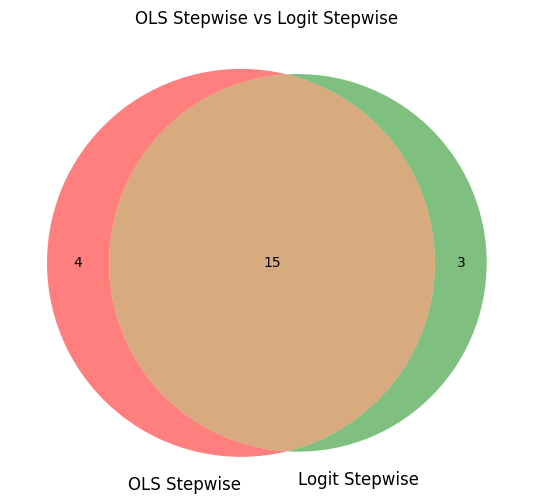

In [18]:
# OLS selected feature
OLS_selected_features = OLS_backward_features + OLS_forward_features
print(f"OLS Forward Features: {OLS_forward_features} Sum of Features: {len(OLS_forward_features)}\n")
print(f"OLS Backward Features: {OLS_backward_features} Sum of Features: {len(OLS_backward_features)}\n")
print(f"All OLS selected features: {set(OLS_selected_features)} Sum of Features: {len(set(OLS_selected_features))}\n")

# Logit selected feature
Logit_selected_features = Logit_backward_features + Logit_forward_features
print(f"Logit Forward Features: {Logit_forward_features} Sum of Features: {len(Logit_forward_features)}\n")
print(f"Logit Backward Features: {Logit_backward_features} Sum of Features: {len(Logit_backward_features)}\n")
print(f"All Logit selected features: {set(Logit_selected_features)} Sum of Features: {len(set(Logit_selected_features))}")

# OLS Forward + Backward vs. Logit Forward + Backward
plt.figure(figsize=(10, 6))
venn2(
    [set(OLS_selected_features), set(Logit_selected_features)],
    ('OLS Stepwise', 'Logit Stepwise'),
    alpha=0.5  # Ë®≠ÂÆöÈÄèÊòéÂ∫¶ÁÇ∫ 0.5Ôºà50%Ôºâ
)
plt.title('OLS Stepwise vs Logit Stepwise')
plt.show()


#### **Â∞èÁµêË´ñ**

**Forward Selection vs. Backward Elimination**
|  | **Forward Selection** | **Backward Elimination** |
|---|-----------------------|--------------------------|
| **Ëµ∑ÂßãÈªû** | Á©∫ÁöÑÁâπÂæµÈõÜ | ÂÆåÊï¥ÁâπÂæµÈõÜÔºàÊâÄÊúâÁâπÂæµÔºâ |
| **Êìç‰ΩúÊñπÂºè** | ÂæûÊú™ÈÅ∏ÊìáÁöÑÁâπÂæµ‰∏≠ÈÅ∏ÊìáÊúÄÊúâÁî®ÁöÑ | ÂæûÊâÄÊúâÁâπÂæµ‰∏≠ÁßªÈô§ÊúÄ‰∏çÈáçË¶ÅÁöÑ |
| **ÂÅúÊ≠¢Ê¢ù‰ª∂** | Ê≤íÊúâÊñ∞ÁâπÂæµÂèØ‰ª•È°ØËëóÊîπÂñÑÊ®°Âûã | ÁßªÈô§ÁâπÂæµÂæåÊ®°ÂûãË°®Áèæ‰∏çÂÜçÊèêÈ´òÊàñÈÅîÂà∞ÊüêÈñæÂÄº |
| **Ë®àÁÆóÊàêÊú¨** | Ë®àÁÆóËºÉÂ∞ëÔºåÂõ†ÁÇ∫ÊØèÊ¨°Âè™Ë©ï‰º∞‰∏ÄÂÄãÁâπÂæµ | Ë®àÁÆóÈáèËºÉÂ§ßÔºåÊØèÊ¨°ÈÉΩÈúÄË¶ÅË®ìÁ∑¥ÂÆåÊï¥Ê®°Âûã‰∏¶Ë©ï‰º∞ÊâÄÊúâÁâπÂæµ |
| **ÂÑ™Èªû** | Á∞°ÂñÆ‰∏îË®àÁÆóÊïàÁéáËºÉÈ´ò | ÂèØ‰ª•Á¢∫‰øùÊâÄÊúâÁâπÂæµÈÉΩË¢´ËÄÉÊÖÆÔºåÊ∏õÂ∞ëÈÅéÊì¨Âêà |
| **Áº∫Èªû** | ÂÆπÊòìÈåØÈÅéÁâπÂæµ‰πãÈñìÁöÑ‰∫§‰∫í‰ΩúÁî® | Ë®àÁÆóÈáèÂ§ßÔºåÂ∞çÊñºÁâπÂæµÊï∏Â§öÁöÑÊÉÖÊ≥ÅÔºåÂèØËÉΩ‰∏çÂàáÂØ¶Èöõ |


#### **LassoCV / Logit Model + LASSO**

- **LassoCV = Linear Model + Cross-val + LASSO**
- **LASSOÔºàL1 Ê≠£ÂâáÂåñÔºâÊòØ‰∏ÄÁ®ÆÁ®ÄÁñèÊÄßÁâπÂæµÈÅ∏ÊìáÊñπÊ≥ï**Ôºö
    - Ëá™ÂãïÈÅ∏ÊìáÁâπÂæµÔºàL1 Ê≠£ÂâáÂåñÊúÉËÆì‰∏çÈáçË¶ÅÁöÑÁâπÂæµÊ¨äÈáçËÆäÊàê 0Ôºâ„ÄÇ
    - ËôïÁêÜÈ´òÁ∂≠Â∫¶Êï∏ÊìöÈõÜÊôÇÈùûÂ∏∏ÊúâÁî®ÔºàÂèØ‰ª•ËôïÁêÜÊØîÊ®£Êú¨Êï∏ÈÇÑÂ§öÁöÑÁâπÂæµÔºâ„ÄÇ
    - ÊØî Forward/Backward Selection Êõ¥Á©©ÂÆöÔºà**ÈÅøÂÖç Overfitting**Ôºâ„ÄÇ
    - ÈÄèÈÅé‰∫§ÂèâÈ©óË≠âÔºåLassoCV ÂèØ‰ª•ÊâæÂà∞Âú®Êú™Áü•Ë≥áÊñô‰∏äË°®ÁèæÊúÄ‰Ω≥ÁöÑ alpha ÂÄº„ÄÇ
Ëá™ÂãïÈÅ∏Êìá alphaÔºö
LassoCV ÊúÉËá™ÂãïÂòóË©¶‰∏çÂêåÁöÑ alpha ÂÄºÔºå‰∏¶‰ΩøÁî®‰∫§ÂèâÈ©óË≠â‰æÜË©ï‰º∞ÊØèÂÄã alpha ÂÄºÁöÑÊïàËÉΩ„ÄÇ
ÈÄô‰ΩøÂæó‰ΩøÁî®ËÄÖ‰∏çÈúÄË¶ÅÊâãÂãïË™øÊï¥ alpha ÂÄº„ÄÇ
  

In [20]:
# LassoCV

lasso_cv = LassoCV(cv=5, random_state=2024, max_iter=10000)  # 5-fold cv

# training - LassoCV ÊúÉËá™ÂãïÂòóË©¶‰∏çÂêåÁöÑ alpha ÂÄºÔºå‰∏¶‰ΩøÁî® CV Ë©ï‰º∞ÊØèÂÄã alpha ÂÄºÁöÑÊïàËÉΩ„ÄÇ
lasso_cv.fit(X_train, y_train)
print(f"Best alpha: {lasso_cv.alpha_}")

# training - ‰ΩøÁî®ÊúÄ‰Ω≥ alpha
lasso_best = Lasso(alpha=lasso_cv.alpha_)
lasso_best.fit(X_train, y_train)

# get coef
lasso_coef = pd.Series(lasso_best.coef_, index=X_train.columns) # lasso.coef_ ÂÑ≤Â≠ò Lasso Ê®°Âûã‰∏≠ÊØèÂÄãÁâπÂæµÁöÑ‰øÇÊï∏

# ÊâæÂá∫Ë¢´ÈÅ∏ÊìáÁöÑÈáçË¶ÅÁâπÂæµÔºàÊ¨äÈáç‰∏çÁÇ∫ 0Ôºâ
lassoCV_features = X_train.columns[lasso_coef != 0]

print(f"Selected features by LassoCVÔºàGood FeaturesÔºâ: {list(lassoCV_features)}")
print(f"Sum of Features:{len(lassoCV_features)}")


Best alpha: 0.0039038738685120066
Selected features by LassoCVÔºàGood FeaturesÔºâ: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea1', 'alea14', 'alea24', 'alea26', 'alea43', 'alea54', 'alea55', 'alea66', 'alea70', 'alea73', 'alea80', 'alea81', 'alea84', 'alea85', 'alea94', 'alea99']
Sum of Features:33


In [21]:
# LogisticRegressionCV = Logit + CV + LASSO

logit_lasso_cv = LogisticRegressionCV(
    penalty='l1',  # LASSO
    solver='liblinear',  # L1 ÈúÄË¶ÅÁî® 'liblinear' Êàñ 'saga'
    cv=5,  # 5-fold
    scoring='accuracy',
    random_state=2024
)

# Ëá™ÂãïÂòóË©¶‰∏çÂêåÁöÑ C ÂÄºÔºå‰∏¶‰ΩøÁî® CV Ë©ï‰º∞ÊØèÂÄã C ÁöÑÊïàËÉΩ
logit_lasso_cv.fit(X_train, y_train)

print(f"Best C: {logit_lasso_cv.C_}")

# ÊâæÂá∫‰øÇÊï∏‰∏çÁÇ∫ 0 ÁöÑÁâπÂæµÔºàÈÄô‰∫õÁâπÂæµË¢´ LASSO ÈÅ∏‰∏≠Ôºâ
logit_lasso_features = X_train.columns[logit_lasso_cv.coef_.flatten() != 0] # .flatten() Â∞á‰øÇÊï∏Áü©Èô£ËΩâÊèõÁÇ∫‰∏ÄÁ∂≠Èô£Âàó

print(f"Selected features by LogisticRegressionCVÔºàGood FeaturesÔºâ: {list(logit_lasso_features)}")
print(f"Sum of Features:{len(logit_lasso_features)}")


Best C: [0.04641589]
Selected features by LogisticRegressionCVÔºàGood FeaturesÔºâ: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea1', 'alea5', 'alea7', 'alea10', 'alea13', 'alea14', 'alea15', 'alea17', 'alea19', 'alea22', 'alea23', 'alea24', 'alea26', 'alea28', 'alea29', 'alea30', 'alea34', 'alea36', 'alea43', 'alea54', 'alea55', 'alea59', 'alea65', 'alea66', 'alea69', 'alea70', 'alea73', 'alea75', 'alea76', 'alea80', 'alea81', 'alea83', 'alea88', 'alea94', 'alea97', 'alea99']
Sum of Features:53


#### **ËÆäÊï∏ÈÅ∏ÊìáÊØîËºÉËàáÊï¥Âêà - ÊñáÊ∞èÂúñÔºàVenn diagramÔºâ**

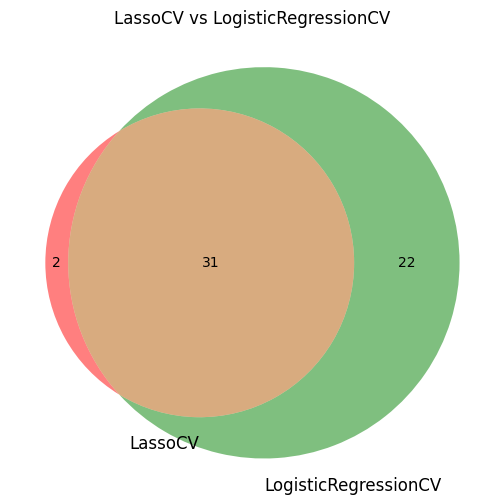

In [22]:
lassoCV_features = set(lassoCV_features)
logit_lasso_features = set(logit_lasso_features)

# LassoCV vs. LogisticRegressionCV
plt.figure(figsize=(10, 6))
venn2(
    [set(lassoCV_features), set(logit_lasso_features)],
    ('LassoCV', 'LogisticRegressionCV'),
    alpha=0.5  # Ë®≠ÂÆöÈÄèÊòéÂ∫¶ÁÇ∫ 0.5Ôºà50%Ôºâ
)
plt.title('LassoCV vs LogisticRegressionCV')
plt.show()


#### **Â∞èÁµêË´ñ**



In [23]:
# ‰∫§ÈõÜÊâÄÊúâ features
common_features = set(OLS_selected_features).intersection(set(Logit_selected_features)).intersection(
    lassoCV_features).intersection(logit_lasso_features)
print(f"All selected common features:\n{common_features}")
print(f"Sum of common features: {len(common_features)}")


All selected common features:
{'v8', 'v14', 'v4', 'v9', 'v16', 'v13', 'v10', 'v12', 'v15', 'v19', 'v11', 'v5', 'v20', 'v17', 'v18'}
Sum of common features: 15


### **ÂàùÊ≠•Ê®°ÂûãË®ìÁ∑¥ËàáË©ï‰º∞ÔºàÊú™ÈÅ∏Êìá featuresÔºâ**

Accuracy: 0.9221
Precision: 0.9135
Recall: 0.9311
F1 Score: 0.9222
AUC: 0.9803


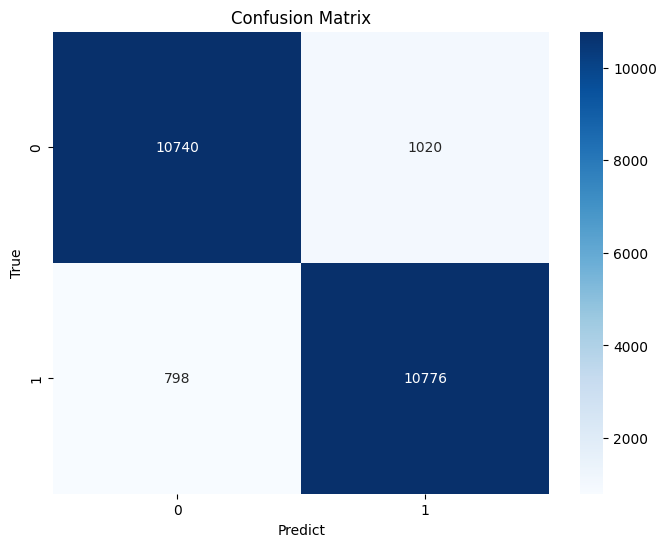

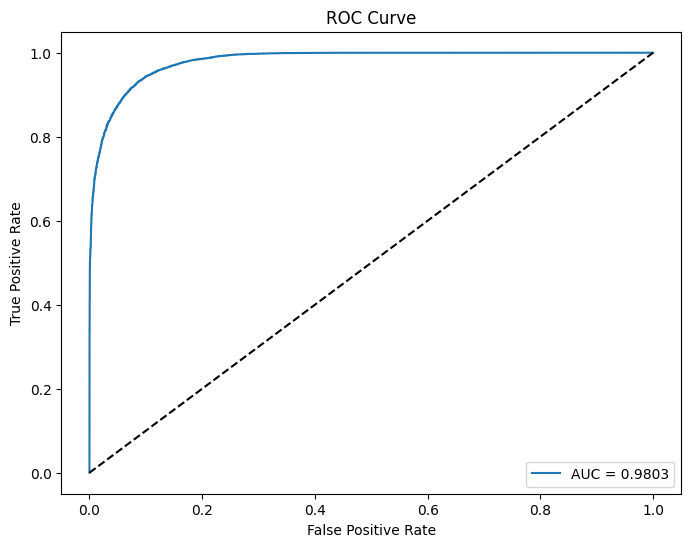

Detail class report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11760
           1       0.91      0.93      0.92     11574

    accuracy                           0.92     23334
   macro avg       0.92      0.92      0.92     23334
weighted avg       0.92      0.92      0.92     23334



In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # y_prob Áî®ÊñºÂÑ≤Â≠òÊ®°ÂûãÈ†êÊ∏¨ÁöÑÊ©üÁéáÂÄº

'''
.predict_proba ÊúÉÂõûÂÇ≥‰∏ÄÂÄãÂΩ¢ÁãÄÁÇ∫ (n_samples, 2) ÁöÑÈô£ÂàóÔºån_samples ÊòØ X_test sample ÁöÑÊï∏Èáè„ÄÇ
Èô£Âàó‰∏≠ÁöÑÊØè‰∏Ä row ÂåÖÂê´ÂÖ©ÂÄãÊ©üÁéáÂÄºÔºö
Á¨¨‰∏ÄÂÄãÂÄºÊòØÊ®£Êú¨Â±¨ÊñºÈ°ûÂà• 0 ÁöÑÊ©üÁéá
Á¨¨‰∫åÂÄãÂÄºÊòØÊ®£Êú¨Â±¨ÊñºÈ°ûÂà• 1 ÁöÑÊ©üÁéá
'''

# evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")

# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Detail class report
print("Detail class report:")
print(classification_report(y_test, y_pred))


### **ÊØîËºÉÊ®°ÂûãË®ìÁ∑¥ËàáË©ï‰º∞ÔºàÈÅ∏ÊìáÁöÑ 15 ÂÄã featuresÔºâ**

Accuracy: 0.9238
Precision: 0.9152
Recall: 0.9327
F1 Score: 0.9239
AUC: 0.9812


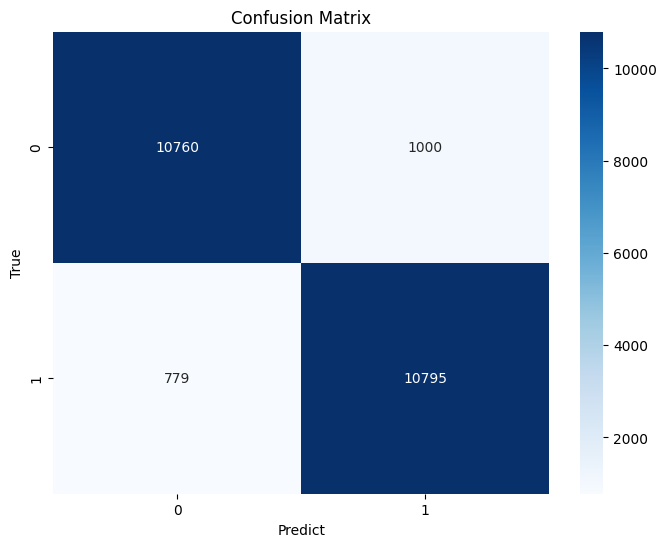

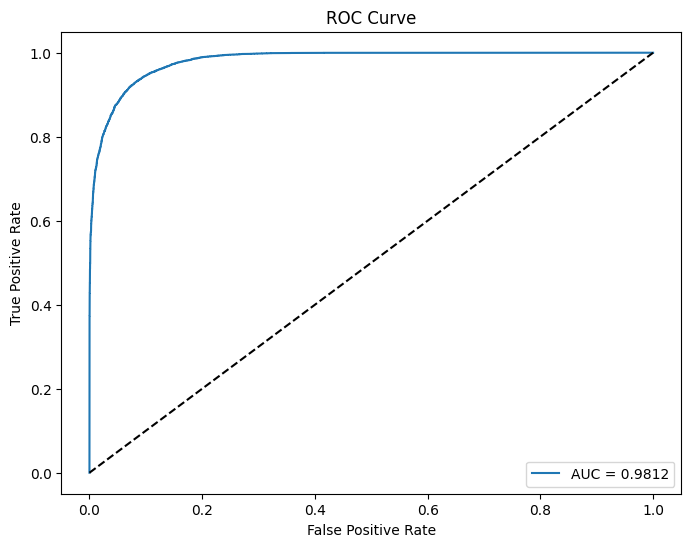

Detail class report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11760
           1       0.92      0.93      0.92     11574

    accuracy                           0.92     23334
   macro avg       0.92      0.92      0.92     23334
weighted avg       0.92      0.92      0.92     23334



In [25]:
# Áî® common_features_list ÁöÑÂÄºÂéªÂ∞çÊáâ X_train.columns ‰∏≠ÁöÑ index ÂÜçÂéªÊâæÂà∞Áõ∏Â∞çÊáâÁöÑ X_train
common_features_list = list(common_features)

X_train_common = X_train.loc[:,common_features_list]
X_test_common = X_test.loc[:, common_features_list]

model = LogisticRegression()
model.fit(X_train_common, y_train)

y_pred = model.predict(X_test_common)
y_prob = model.predict_proba(X_test_common)[:, 1] # y_prob Áî®ÊñºÂÑ≤Â≠òÊ®°ÂûãÈ†êÊ∏¨ÁöÑÊ©üÁéáÂÄº

'''
.predict_proba ÊúÉÂõûÂÇ≥‰∏ÄÂÄãÂΩ¢ÁãÄÁÇ∫ (n_samples, 2) ÁöÑÈô£ÂàóÔºån_samples ÊòØ X_test sample ÁöÑÊï∏Èáè„ÄÇ
Èô£Âàó‰∏≠ÁöÑÊØè‰∏Ä row ÂåÖÂê´ÂÖ©ÂÄãÊ©üÁéáÂÄºÔºö
Á¨¨‰∏ÄÂÄãÂÄºÊòØÊ®£Êú¨Â±¨ÊñºÈ°ûÂà• 0 ÁöÑÊ©üÁéá
Á¨¨‰∫åÂÄãÂÄºÊòØÊ®£Êú¨Â±¨ÊñºÈ°ûÂà• 1 ÁöÑÊ©üÁéá
'''

# evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")

# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Detail class report
print("Detail class report:")
print(classification_report(y_test, y_pred))


#### **Result**

- **Á¨¨‰∏ÄÂÄãÊ®°Âûã**‰ΩøÁî®**ÂÖ®ÈÉ® 121 ÂÄãÁâπÂæµ**ÈÄ≤Ë°åË®ìÁ∑¥„ÄÇ  
- **Á¨¨‰∫åÂÄãÊ®°Âûã**ÈÄèÈÅé**ÁâπÂæµÈÅ∏ÊìáÔºàFeature SelectionÔºâ**ÔºåÂè™‰ΩøÁî®**15 ÂÄãÁâπÂæµ**ÈÄ≤Ë°åË®ìÁ∑¥„ÄÇ  

**Feature Selection ÊúâÊïàÔºåÊ∏õÂ∞ëÁâπÂæµÊï∏Èáè‰∏¶Ê≤íÊúâÈôç‰ΩéÊ®°ÂûãÊïàËÉΩ**Ôºö  
- ‰ΩøÁî® **15 ÂÄãÁâπÂæµÁöÑÊ®°Âûã** ÂèñÂæóËàá **121 ÂÄãÁâπÂæµÁöÑÊ®°Âûã** Âπæ‰πéÁõ∏ÂêåÁöÑÊ∫ñÁ¢∫Áéá„ÄÅÁ≤æÁ¢∫Áéá„ÄÅÂè¨ÂõûÁéáÂíå AUCÔºåÁîöËá≥Áï•ÂæÆÊèêÂçá„ÄÇ
- ‰∏¶**Ê∏õÂ∞ë‰∫Ü 87.6%Ôºà106 ÂÄãÁâπÂæµÔºâ**Ôºå‰ª£Ë°®Â§ßÈáèÁöÑÁâπÂæµÂèØËÉΩÂåÖÂê´ÂÜóÈ§ò‰ø°ÊÅØÔºåÁîöËá≥ÂèØËÉΩÂ∏∂‰æÜÂô™ËÅ≤ÔºåÂΩ±ÈüøÊ®°ÂûãÊ≥õÂåñËÉΩÂäõ„ÄÇ

**Ë®àÁÆóÊïàÁéáÊèêÂçá**Ôºö  
- **Á¨¨‰∫åÂÄãÊ®°ÂûãÊõ¥ËºïÈáèÁ¥ö**ÔºåË®ìÁ∑¥ËàáÈ†êÊ∏¨ÈÄüÂ∫¶Êõ¥Âø´ÔºåÈÅ©Âêà **Â§ßË¶èÊ®°Êï∏ÊìöËôïÁêÜÊàñÂç≥ÊôÇÈ†êÊ∏¨ÊáâÁî®**„ÄÇ  
- **Ë®òÊÜ∂È´îËàáÂ≠òÂÑ≤ÈúÄÊ±ÇÂ§ßÂπÖÈôç‰Ωé**ÔºåÈÅ©ÂêàÈÉ®ÁΩ≤Âà∞Ë≥áÊ∫êÊúâÈôêÁöÑÁí∞Â¢É„ÄÇ  


**üîπÊåáÊ®ôÊØîËºÉËàáÂàÜÊûê**
| ÊåáÊ®ô | Model 1Ôºà121 ÁâπÂæµÔºâ | Model 2Ôºà15 ÁâπÂæµÔºâ | Â∑ÆÁï∞ |
|------|-----------------|----------------|------|
| **Accuracy** | 0.9221 | 0.9238 | **+0.0017** ‚Üë |
| **Precision** | 0.9135 | 0.9152 | **+0.0017** ‚Üë |
| **Recall** | 0.9311 | 0.9327 | **+0.0016** ‚Üë |
| **F1 Score** | 0.9222 | 0.9239 | **+0.0017** ‚Üë |
| **AUC-ROC** | 0.9803 | 0.9812 | **+0.0009** ‚Üë |


**ÁÇ∫‰ªÄÈ∫ºÂ∞ëÁâπÂæµÁöÑÊ®°Âûã‰ªçÁÑ∂Ë°®ÁèæËâØÂ•ΩÔºü**
1. **ÈÅéÂ§öÁâπÂæµÂèØËÉΩÂ∞éËá¥ Overfitting**
   - ÂéüÂßã 121 ÂÄãÁâπÂæµ‰∏≠ÔºåÂèØËÉΩÊúâ**Ë®±Â§öÁõ∏ÈóúÊÄß‰ΩéÁöÑÁâπÂæµ**Êàñ**È´òÂÖ±Á∑öÊÄßÁâπÂæµ**ÔºåÈÄôÂèØËÉΩËÆìÊ®°ÂûãÂú®Ë®ìÁ∑¥ÈõÜË°®ÁèæÂæàÂ•ΩÔºå‰ΩÜÂú®Ê∏¨Ë©¶ÈõÜÊ≥õÂåñËÉΩÂäõ‰∏ãÈôç„ÄÇ
   - **LASSO ÊàñÂÖ∂‰ªñÁâπÂæµÈÅ∏ÊìáÊäÄË°ì** ÂèØËÉΩÂéªÈô§‰∫ÜÂΩ±ÈüøÊ≥õÂåñËÉΩÂäõÁöÑÂô™ËÅ≤ËÆäÊï∏Ôºå‰ΩøÂæó Model 2 Êõ¥ÂÖ∑Á©©ÂÆöÊÄß„ÄÇ

2. **È´òÁ∂≠Â∫¶ÂèØËÉΩÂΩ±ÈüøÊ®°ÂûãÁöÑÂ≠∏Áøí**
   - Âú®**È´òÁ∂≠Êï∏ÊìöÔºà121 Á∂≠Ôºâ** ‰∏ãÔºå**Ê®°ÂûãÂèØËÉΩÈõ£‰ª•Ë≠òÂà•ÁúüÊ≠£ÂΩ±Èüø y ÁöÑÈóúÈçµÁâπÂæµ**ÔºåÂ∞éËá¥ noise ÂΩ±ÈüøÂ≠∏Áøí„ÄÇ
   - **ÈôçÁ∂≠Ôºà‰ΩøÁî® 15 ÂÄãÊúÄ‰Ω≥ÁâπÂæµÔºâÂæåÔºåÊ®°ÂûãÊõ¥ÂÆπÊòìÂ≠∏ÁøíÈáçË¶ÅÊ®°Âºè**ÔºåÊ∏õÂ∞ë‰∏çÂøÖË¶ÅÁöÑË®àÁÆóÔºåÁîöËá≥ÊèêÂçáÊ∫ñÁ¢∫Â∫¶„ÄÇ

3. **Â∞ëÈáèÈ´òÂΩ±ÈüøÂäõÁâπÂæµÂ∑≤Á∂ìË∂≥Â§†**
   - Âè™Ë¶ÅÂ∞ëÊï∏ÈóúÈçµÁâπÂæµËÉΩÂ§†ÊúâÊïàÂçÄÂàÜÁõÆÊ®ôÈ°ûÂà•ÔºåÂ¢ûÂä†Êõ¥Â§öÁâπÂæµÁöÑ**ÈÇäÈöõÊïàÁõäÔºàMarginal GainÔºâÂ∞±ÊúÉÈÅûÊ∏õ**„ÄÇ
   - **Á¨¨‰∫åÂÄãÊ®°ÂûãÁöÑ 15 ÂÄãÁâπÂæµÂèØËÉΩÂ∑≤Á∂ìÂåÖÂê´‰∫ÜÊâÄÊúâÈóúÈçµË≥áË®ä**ÔºåËÄåÂÖ∂‰ªñÁâπÂæµÂè™ÊòØÈ°çÂ§ñÂô™ËÅ≤„ÄÇ
